In [ ]:
import numpy as np
# Sets the numpy arrays to truncate numbers with many digits down to 4.
np.set_printoptions(suppress=True,formatter={'all': lambda x: "{:.4g}".format(x)})
from sympy import symbols
from qiskit import QuantumCircuit
from qiskit.circuit.library import UnitaryGate
from qiskit.quantum_info import Operator, Statevector
from qiskit.visualization import plot_state_city

from qiskit.circuit.library import HGate
import cmath

R2 = np.array([[1,0],[0,np.e**(2*np.pi*1j/4)]],dtype=complex)
R2dag = R2.conj().T
R3 = np.array([[1,0],[0,np.e**(2*np.pi*1j/8)]],dtype=complex)
R3dag = R3.conj().T

R2gate = UnitaryGate(R2,label="R2")
R2daggate = UnitaryGate(R2dag,label="R2+")

R3gate = UnitaryGate(R3,label="R3")
R3daggate = UnitaryGate(R3dag,label="R3+")


cR2 = R2gate.control(1,label="")
cR2dag = R2daggate.control(1,label="")

cR3 = R3gate.control(1,label="")
cR3dag = R3daggate.control(1,label="")


qc = QuantumCircuit(3)

qc.h(0)
qc.append(cR2,[1,0])
qc.append(cR3,[2,0])

qc.h(1)
qc.append(cR2,[2,1])

qc.h(2)

qc.swap(0,2)

qc.barrier()

qc.swap(0,2)

qc.h(2)

qc.append(cR2dag,[2,1])
qc.h(1)

qc.append(cR3dag,[2,0])
qc.append(cR2dag,[1,0])
qc.h(0)

qc.draw('mpl')


[[1+0j 0+0j 0+0j ... 0+0j 0+0j 0+0j]
 [0+0j 1+0j 0+0j ... 0+0j 0+0j 0+0j]
 [0+0j 0+0j 1+0j ... 0+0j 0+0j 0+0j]
 ...
 [0+0j 0+0j 0+0j ... 1+0j 0+0j 0+0j]
 [0+0j 0+0j 0+0j ... 0+0j 1+0j 0+0j]
 [0+0j 0+0j 0+0j ... 0+0j 0+0j 1+0j]]


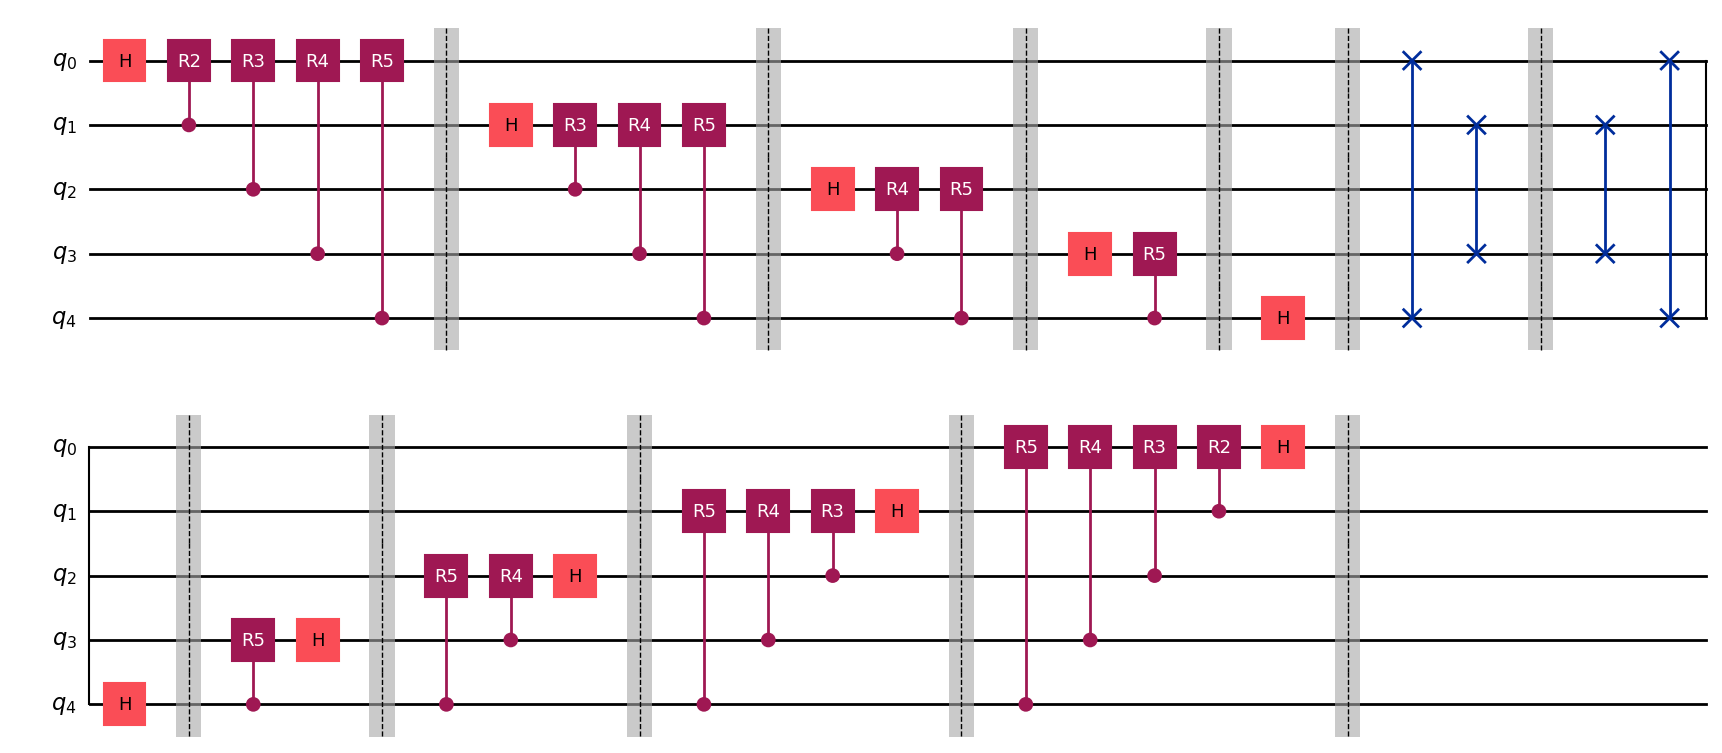

In [3]:
import numpy as np
# Sets the numpy arrays to truncate numbers with many digits down to 4.
np.set_printoptions(suppress=True,formatter={'all': lambda x: "{:.4g}".format(x)})
from sympy import symbols
from qiskit import QuantumCircuit
from qiskit.circuit.library import UnitaryGate
from qiskit.quantum_info import Operator, Statevector
from qiskit.visualization import plot_state_city

from qiskit.circuit.library import HGate
import cmath


def R(k):
    R = np.array([[1,0],[0,np.e**(2*np.pi*1j/(2**k))]])
    Rgate = UnitaryGate(R,label=("R"+str(k+1)))
    cR = Rgate.control(1)
    return cR

def Rdag(k):
    R = np.array([[1,0],[0,np.e**(2*np.pi*-1j/(2**k))]])
    Rgate = UnitaryGate(R,label=("R"+str(k+1)))
    cR = Rgate.control(1)
    return cR

def QFT(circuit,n):
    for j in range(n):
        circuit.h(j)

        for k in range(j+1,n):
            circuit.append(R(k),[k,j])
        circuit.barrier()
    
    for i in range(n//2):
        circuit.swap(i,n-i-1)
    return circuit

def IQFT(circuit,n):
    for i in reversed(range(n//2)):
        circuit.swap(i,n-i-1)
    for j in reversed(range(n)):
        for k in reversed(range(j+1,n)):
            circuit.append(Rdag(k),[k,j])
        circuit.h(j)
        circuit.barrier()
    return circuit

n = 5

qc = QuantumCircuit(n)

QFT(qc,n)
qc.barrier()
IQFT(qc,n)

unitary = Operator(qc.reverse_bits()).data
threshold = 1e-10
unitary.real[np.abs(unitary.real) < threshold] = 0
unitary.imag[np.abs(unitary.imag) < threshold] = 0
print(unitary)


qc.draw("mpl")